# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Irma Indriana Hariawang
- **Email:** irma_loh@yahoo.com
- **ID Dicoding:** irma_h
- **Sumber Dataset:** https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data?select=olist_customers_dataset.csv

### Menentukan Pertanyaan Bisnis

1. Produk kategori apa yang paling banyak dan paling sedikit penjualannya?
2. Tunjukkan 10 kota yang menjadi domisili pembeli terbanyak!
3. Bagaimana tren penjualan dalam kurun waktu data didapatkan?
4. Bagaimana analisis RFM terhadap customer? insight apa yang didapatkan?

### Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

Dataset yang digunakan :
- orders_dataset.csv
- order_items_dataset.csv
- customers_dataset.csv
- sellers_dataset.csv
- products_dataset.csv
- product_category_name_translation.csv

### Gathering Data

In [2]:
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [3]:
order_items_df = pd.read_csv("order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
customers_df = pd.read_csv("customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
sellers_df = pd.read_csv("sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [6]:
products_df = pd.read_csv("products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
product_category_english_df = pd.read_csv("product_category_name_translation.csv")
product_category_english_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assesing Data

#### Menilai tabel customers_df

In [8]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [10]:
print("Jumlah duplikasi : ", customers_df.duplicated().sum())

Jumlah duplikasi :  0


In [11]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai tabel orders_df

In [12]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [13]:
orders_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [14]:
print("Jumlah duplikasi : ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi :  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [15]:
orders_df.duplicated("order_id").sum()

0

In [16]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Kita akan menggunakan kolom order_purchase_timestamp karena tidak mempunyai missing values

#### Menilai tabel order_items_df

In [17]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [18]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [19]:
order_items_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [20]:
print("Jumlah duplikasi : ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi :  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai tabel sellers_df

In [21]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [22]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [23]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [24]:
sellers_df.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

#### Menilai tabel products_df

In [25]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [26]:
print("Jumlah duplikasi: ",products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [27]:
products_df.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [28]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Terdapat baris yang kosong pada tabel products_df

#### Menilai tabel product_category_english_df

In [29]:
product_category_english_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [30]:
product_category_english_df.nunique()

product_category_name            71
product_category_name_english    71
dtype: int64

In [31]:
product_category_english_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [32]:
print("Jumlah duplikasi : ", product_category_english_df.duplicated().sum())
product_category_english_df.describe()

Jumlah duplikasi :  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Cleaning Data

#### Membersihkan tabel orders_df

In [33]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


##### Mengganti tipe data

In [34]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at",
                    "order_delivered_carrier_date",
                    "order_delivered_customer_date",
                    "order_estimated_delivery_date"]
for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [35]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Membersihkan tabel products_df dan product_category_english

##### Missing values

In [36]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [37]:
products_df.product_category_name.value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [38]:
product_category_english_df.product_category_name_english.value_counts()

product_category_name_english
health_beauty                1
food                         1
fashion_sport                1
fashion_underwear_beach      1
construction_tools_safety    1
                            ..
luggage_accessories          1
cool_stuff                   1
fashion_shoes                1
audio                        1
security_and_services        1
Name: count, Length: 71, dtype: int64

Jumlah nilai unik dari product_category_name (dlm bahasa Portugal) = 73.
Jumlah nilai unik dari product_category_name_english (dlm bahasa Inggris) = 71.
Berarti ada 2 product dalam bhs Portugal yang tidak ada padanannya dalam bahasa Inggris.

##### Menggabungkan data products_df dan product_category_english_df

In [39]:
all_products = pd.merge(
    left=products_df,
    right=product_category_english_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
all_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [40]:
all_products.product_category_name.loc[all_products.product_category_name_english.isna()
& all_products.product_category_name.notnull()].unique()


array(['pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'],
      dtype=object)

In [41]:
# Mengisi missing value pd kolom product_category_name_english sesuai dengan kata
# padanannya dalam kolom product_category_name
# Mengisi baris yg berisi NaN dengan nama "other_products"

for i in list (all_products.loc[all_products.product_category_name_english.isna()].index) :
    if all_products['product_category_name'].iloc[i] == 'pc_gamer' : 
        all_products['product_category_name_english'].iloc[i] = 'pc_gaming'
    elif all_products['product_category_name'].iloc[i] == 'portateis_cozinha_e_preparadores_de_alimentos' :
        all_products['product_category_name_english'].iloc[i] = 'portable_kitchen_and_food_prepare'
    else :
        all_products['product_category_name_english'].iloc[i] = 'other_products'
    

In [42]:
all_products.product_category_name.isna()

0        False
1        False
2        False
3        False
4        False
         ...  
32946    False
32947    False
32948    False
32949    False
32950    False
Name: product_category_name, Length: 32951, dtype: bool

In [43]:
all_products.product_category_name.fillna(value="other_products", inplace=True)

In [44]:
all_products.isna().sum()

product_id                         0
product_category_name              0
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english      0
dtype: int64

Sudah tidak ada missing values pada kolom product_category_name dan product_category_name_english

## Exploratory Data Analysis (EDA)

Setelah proses cleaning data, skr kita mempunyai 5 tabel, yaitu :
- customers_df
- sellers_df
- all_products
- orders_df
- order_items_df

### Explore customers_df

In [45]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
98842,22d71d5bfb32603ec8ebdf2bf6bde858,d6cc0da84bab73e02c4a3afaffa8abe6,38280,iturama,MG
3211,82a781c07728515614b37ed49101b063,2968cb453924e6c2381a1f4320c50e94,2223,sao paulo,SP
53377,320eefc764d8d3c3b9c88173c7e46943,9563467c58d0288dddd8ed8ba3a7e785,31615,belo horizonte,MG
47031,278d8ca725342a1f850e1ebbe341b052,e9dde8681b9a6edddc49eb0fabad01f0,4186,sao paulo,SP
98250,3ff05485c0ca23db85b36f0496d71d5b,31ecad36683b9b0ba61de1140f4857bf,5713,sao paulo,SP


In [46]:
customers_df.customer_unique_id.is_unique

False

Menghapus kolom yang tidak diperlukan, yaitu : customer_zip_code_prefix

In [47]:
customers_df.drop(columns=["customer_zip_code_prefix"], inplace=True)

In [48]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_city       99441 non-null  object
 3   customer_state      99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


In [49]:
customers_by_city = customers_df.groupby(by="customer_city").customer_unique_id.nunique().sort_values(ascending=False).reset_index()
customers_by_city.head(10)


,customer_city,customer_unique_id
0,sao paulo,14984
1,rio de janeiro,6620
2,belo horizonte,2672
3,brasilia,2069
4,curitiba,1465
5,campinas,1398
6,porto alegre,1326
7,salvador,1209
8,guarulhos,1153
9,sao bernardo do campo,908


In [50]:
customers_by_state = customers_df.groupby(by="customer_state").customer_unique_id.nunique().sort_values(ascending=False).reset_index()
customers_by_state.head(10)


,customer_state,customer_unique_id
0,SP,40302
1,RJ,12384
2,MG,11259
3,RS,5277
4,PR,4882
5,SC,3534
6,BA,3277
7,DF,2075
8,ES,1964
9,GO,1952


### Explore sellers_df

In [51]:
sellers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2797,f307937c1bb287c3efc2a514b94b0d1d,38183,araxa,MG
556,8a207b6080964f3c1fc9d35bd6096ba4,15155,jaci,SP
1578,bb5d956dece964a06c12bceb66b923ae,20930,rio de janeiro,RJ
575,b5d034ac251546e25afe9067f05c1539,6852,itapecerica da serra,SP
1141,b88e7c57cb2d8b973b7dd4a2bfa14b36,81350,curitiba,PR


Menghapus kolom yang tidak diperlukan, yaitu : seller_zip_code_prefix

In [52]:
sellers_df.drop(columns=["seller_zip_code_prefix"], inplace=True)


In [53]:
sellers_df.head()

,seller_id,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP


In [54]:
sellers_df.seller_id.is_unique

True

In [55]:
seller_by_city = sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).reset_index()
seller_by_city.head(10)


,seller_city,seller_id
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52
5,guarulhos,50
6,ibitinga,49
7,santo andre,45
8,campinas,41
9,maringa,40


In [56]:
seller_by_state = sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).reset_index()
seller_by_state.head(10)


,seller_state,seller_id
0,SP,1849
1,PR,349
2,MG,244
3,SC,190
4,RJ,171
5,RS,129
6,GO,40
7,DF,30
8,ES,23
9,BA,19


### Explore all_products

In [57]:
all_products.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
21003,8ca3654e07bd7120dd72ccbcba187753,esporte_lazer,9.0,252.0,1.0,200.0,28.0,5.0,14.0,sports_leisure
6066,9804060d742be8facca9ff94f9aa436e,automotivo,57.0,1291.0,4.0,617.0,22.0,17.0,15.0,auto
21373,eba9bf6c14ca3ce171d097e358b12973,bebes,38.0,1516.0,1.0,700.0,50.0,30.0,40.0,baby
13254,220936209904d02af36d9aabe5343c8a,esporte_lazer,54.0,350.0,1.0,550.0,21.0,21.0,19.0,sports_leisure
23123,340f33bdf4103eba89df5d5153beff7e,moveis_decoracao,60.0,1482.0,1.0,900.0,63.0,5.0,15.0,furniture_decor


Menghapus kolom yang tidak diperlukan, yaitu : 
1. product_category_name
2. product_name_lenght
3. product_description_lenght
4. product_photos_qty
5. product_weight_g
6. product_lenght_cm
7. product_height_cm
8. product_width_cm

In [58]:
all_products.drop(all_products.iloc[:,2:9], axis=1, inplace=True)

In [59]:
all_products.isna().sum()

product_id                       0
product_category_name            0
product_category_name_english    0
dtype: int64

In [60]:
all_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     32951 non-null  object
 1   product_category_name          32951 non-null  object
 2   product_category_name_english  32951 non-null  object
dtypes: object(3)
memory usage: 772.4+ KB


### Explore orders_df

In [61]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
33476,1ac9d38dde347ffac03bdb653003682b,667cece2c46332f911cf581ff412cdf5,delivered,2017-11-13 16:27:21,2017-11-14 04:16:11,2017-11-16 13:51:56,2017-11-24 01:43:47,2017-12-06
10847,cbb8c3748ad61bcd4011720d8a58a3a0,a43feec22398d94452ebb06dba1ff80d,shipped,2018-08-17 13:11:13,2018-08-17 14:30:40,2018-08-20 13:41:00,NaT,2018-08-29
88704,e72511587872c5769d43aeda089b28ca,d5e32f4d48eefeadfbcb1b8e068369fe,delivered,2017-11-27 11:26:16,2017-11-29 11:37:15,2017-11-30 21:51:22,2017-12-14 21:21:33,2017-12-28
56135,7b3950b933fe73d96ce4359a1caf38ea,b5a6dbf7832c882c72222308a2ae44d9,delivered,2018-05-27 22:13:33,2018-05-28 08:30:21,2018-05-29 10:57:00,2018-06-04 23:32:29,2018-07-18
70414,a327b5ecc65060cc462211724d715367,f63b5a41ad60764ade63d0cae2f8b5b2,unavailable,2017-12-08 22:41:10,2017-12-08 22:52:43,NaT,NaT,2017-12-27


Menghapus kolom yang tidak diperlukan, yaitu :
1. order_delivered_carrier_date
2. order_delivered_customer_date
3. order_estimated_delivery_date

In [62]:
orders_df.drop(orders_df.iloc[:,5:7], axis=1, inplace=True)

In [63]:
orders_df.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                160
order_estimated_delivery_date      0
dtype: int64

In [64]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(3)
memory usage: 4.6+ MB


### Explore order_items_df

In [65]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
104537,ed77ae1d4803934a1131cadffb78b41b,4,fc1449f3ffc59fd2eb9640505aea0581,25c5c91f63607446a97b143d2d535d31,2017-10-13 14:14:16,149.88,18.30
104853,ee305cf301da8441d91ae8a06d8a9ecc,1,c90cf9075d7e8a5f4eca8b39763bf2e5,6a8b085f816a1f75f92dbac6eb545f8f,2018-05-09 04:13:02,61.50,37.12
74393,a97ed6ffd3a1daacc526d95fe844c8a5,1,ab1f9387c0627dd24000bfbc54fdeee0,8b321bb669392f5163d04c59e235e066,2018-05-18 11:58:37,12.25,7.39
44971,664411dc25ffd21164cc72805f249313,1,55a257b8a93fa8ce0b4774de48718126,4aba391bc3b88717ce08eb11e44937b2,2017-10-10 01:01:59,669.00,16.93
60559,8a060d4d621f570de2264a68ad8b901c,1,82e4ad16521ca131d95e198d507db370,128639473a139ac0f3e5f5ade55873a5,2017-12-13 15:30:17,18.90,16.79


##### Menghapus kolom shipping_limit_date

In [66]:
order_items_df.drop(columns=["shipping_limit_date"],inplace=True)

In [67]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   seller_id      112650 non-null  object 
 4   price          112650 non-null  float64
 5   freight_value  112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB


### Menggabungkan tabel

#### Tabel order_items_df dan all_products

In [68]:
order_items_products = pd.merge(
    left=order_items_df,
    right=all_products,
    how="left", #Agar terpilih product yang di order
    left_on="product_id",
    right_on="product_id"
)

In [69]:
order_items_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   price                          112650 non-null  float64
 5   freight_value                  112650 non-null  float64
 6   product_category_name          112650 non-null  object 
 7   product_category_name_english  112650 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.9+ MB


In [70]:
order_items_products.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
freight_value                    0
product_category_name            0
product_category_name_english    0
dtype: int64

In [71]:
order_items_products.duplicated().sum()

0

#### Tabel order_items_product dengan sellers_df

In [72]:
items_products_sellers = pd.merge(
    left=order_items_products,
    right=sellers_df,
    how="left", #Agar terpilih seller yang menjual produk
    left_on="seller_id",
    right_on="seller_id"
)

In [73]:
items_products_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   price                          112650 non-null  float64
 5   freight_value                  112650 non-null  float64
 6   product_category_name          112650 non-null  object 
 7   product_category_name_english  112650 non-null  object 
 8   seller_city                    112650 non-null  object 
 9   seller_state                   112650 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 8.6+ MB


In [74]:
items_products_sellers.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
freight_value                    0
product_category_name            0
product_category_name_english    0
seller_city                      0
seller_state                     0
dtype: int64

In [75]:
items_products_sellers.duplicated().sum()

0

#### Tabel orders_df dengan customers_df

In [76]:
orders_customers = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left", #Agar terpilih customer yang membeli produk
    left_on="customer_id",
    right_on="customer_id"
)

In [77]:
orders_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 6   customer_unique_id             99441 non-null  object        
 7   customer_city                  99441 non-null  object        
 8   customer_state                 99441 non-null  object        
dtypes: datetime64[ns](3), object(6)
memory usage: 6.8+ MB


Menghapus kolom order_approved_at dan order_estimated_delivery_date

In [78]:
orders_customers.drop(columns=["order_approved_at","order_estimated_delivery_date"], axis=1, inplace=True)

In [79]:
orders_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_status              99441 non-null  object        
 3   order_purchase_timestamp  99441 non-null  datetime64[ns]
 4   customer_unique_id        99441 non-null  object        
 5   customer_city             99441 non-null  object        
 6   customer_state            99441 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 5.3+ MB


In [80]:
orders_customers.isna().sum()

order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
customer_unique_id          0
customer_city               0
customer_state              0
dtype: int64

In [81]:
orders_customers.duplicated().sum()

0

#### Menggabungkan semua tabel (orders_customers dan items_products_sellers)

In [82]:
all_data = pd.merge(
    left=orders_customers,
    right=items_products_sellers,
    how="left", #Agar terpilih item, product dan seller sesuai order_id
    left_on="order_id",
    right_on="order_id"
)

In [83]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   customer_id                    113425 non-null  object        
 2   order_status                   113425 non-null  object        
 3   order_purchase_timestamp       113425 non-null  datetime64[ns]
 4   customer_unique_id             113425 non-null  object        
 5   customer_city                  113425 non-null  object        
 6   customer_state                 113425 non-null  object        
 7   order_item_id                  112650 non-null  float64       
 8   product_id                     112650 non-null  object        
 9   seller_id                      112650 non-null  object        
 10  price                          112650 non-null  float64       
 11  

In [84]:
all_data.duplicated().sum()

0

In [85]:
all_data.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
customer_unique_id                 0
customer_city                      0
customer_state                     0
order_item_id                    775
product_id                       775
seller_id                        775
price                            775
freight_value                    775
product_category_name            775
product_category_name_english    775
seller_city                      775
seller_state                     775
dtype: int64

Terdapat 775 order_item_id yang tidak mempunyai order_id, dan akan kita hapus

In [86]:
all_data.dropna()

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_category_name_english,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,utilidades_domesticas,housewares,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,perfumaria,perfumery,belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,automotivo,auto,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,pet_shop,pet_shop,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72,papelaria,stationery,mogi das cruzes,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,praia grande,SP,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,174.90,20.10,bebes,baby,tupa,SP
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,205.99,65.02,eletrodomesticos_2,home_appliances_2,sao paulo,SP
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59,informatica_acessorios,computers_accessories,ilicinea,MG
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59,informatica_acessorios,computers_accessories,ilicinea,MG


Data sudah bersih, terdiri dari 112.650 baris dan 16 kolom

## Visualization & Explanatory Analysis

### Pertanyaan 1

#### Produk dalam kategori apa yang memiliki jumlah pesanan paling banyak dan paling sedikit?

In [87]:
sum_order_items_df = all_data.groupby(by="product_category_name_english").agg({
    "order_id":"nunique",
    "price":"sum"
}).reset_index()
sum_order_items_df

,product_category_name_english,order_id,price
0,agro_industry_and_commerce,182,72530.47
1,air_conditioning,253,55024.96
2,art,202,24202.64
3,arts_and_craftmanship,23,1814.01
4,audio,350,50688.50
...,...,...,...
69,stationery,2311,230943.23
70,tablets_printing_image,79,7528.41
71,telephony,4199,323667.53
72,toys,3886,483946.60


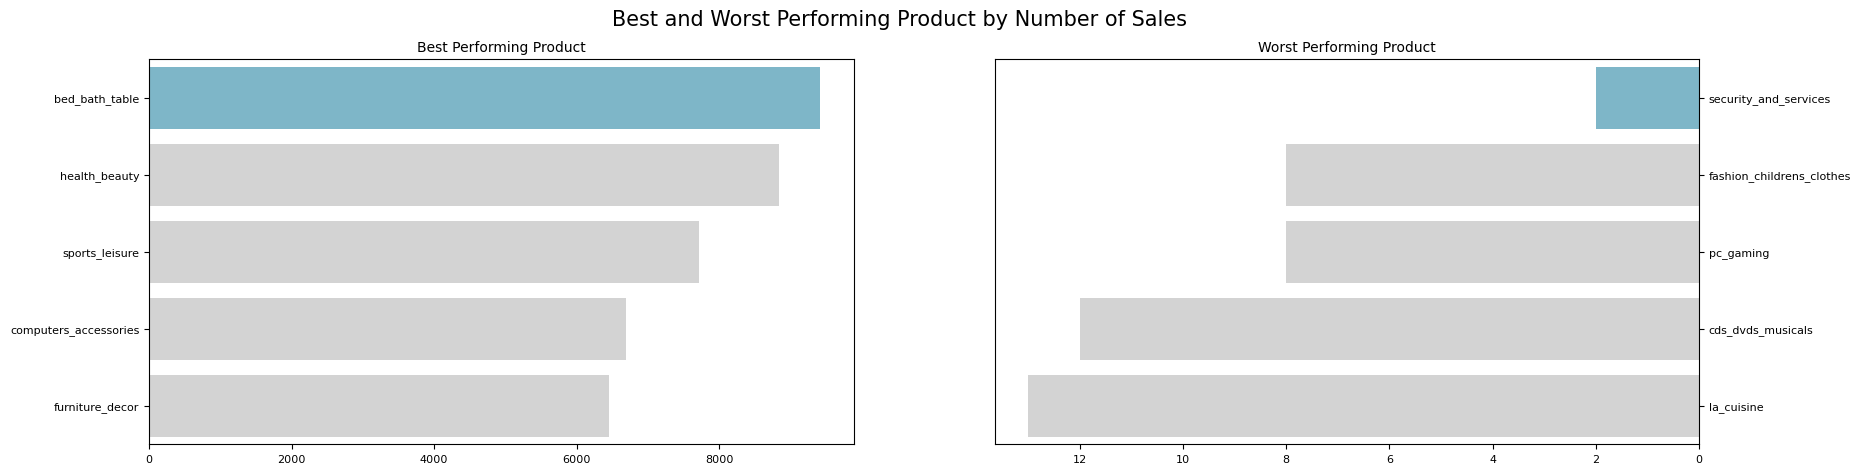

In [88]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_id", y="product_category_name_english", data=sum_order_items_df.sort_values(by="order_id", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=10)
ax[0].tick_params(axis='y', labelsize=8)
ax[0].tick_params(axis='x', labelsize=8)

sns.barplot(x="order_id", y="product_category_name_english", data=sum_order_items_df.sort_values(by="order_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=10)
ax[1].tick_params(axis='y', labelsize=8)
ax[1].tick_params(axis='x', labelsize=8)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=15)
plt.show()


Produk heatlh and beauty memiliki jumlah total order tertinggi sementera produk security and services memiliki jumlah total order paling sedikit.

### Pertanyaan 2 (Demografi Pelanggan)

#### Tunjukkan 10 kota dengan pembeli terbanyak!

In [89]:
customers_by_city = all_data.groupby(by="customer_city").customer_unique_id.nunique().sort_values(ascending=False).reset_index()
customers_by_city.rename(columns={
    "customer_unique_id":"customer_count"
}, inplace=True)

customers_by_city.head(10)


,customer_city,customer_count
0,sao paulo,14984
1,rio de janeiro,6620
2,belo horizonte,2672
3,brasilia,2069
4,curitiba,1465
5,campinas,1398
6,porto alegre,1326
7,salvador,1209
8,guarulhos,1153
9,sao bernardo do campo,908


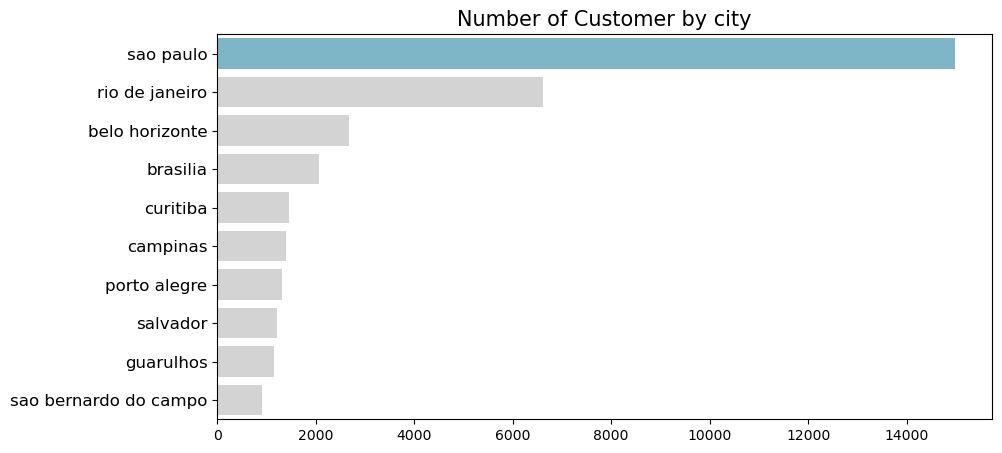

In [90]:
plt.figure(figsize=(10,5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="customer_city",
    data=customers_by_city.head(10),
    palette=colors
)
plt.title("Number of Customer by city", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Kota dengan jumlah pembeli terbanyak adalah :
1. Sao Paulo
2. Rio de Janeiro
3. Belo Horizonte
4. Brasilia
5. Curitiba
6. Campinas
7. Porto Alegre
8. Salvador
9. Guarulhos
10. Sao Bernardo do Campo

### Pertanyaan 3

#### Bagaimana tren penjualan dalam kurun waktu data didapatkan?

In [92]:
monthly_orders_df = all_data.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%m-%Y') #mengubah format order date menjadi Tahun-Bulan
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_purchase_timestamp":"order_date",
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_orders_df


,order_date,order_count,revenue
0,09-2016,4,267.36
1,10-2016,324,49507.66
2,11-2016,0,0.00
3,12-2016,1,10.90
4,01-2017,800,120312.87
5,02-2017,1780,247303.02
6,03-2017,2682,374344.30
7,04-2017,2404,359927.23
8,05-2017,3700,506071.14
9,06-2017,3245,433038.60


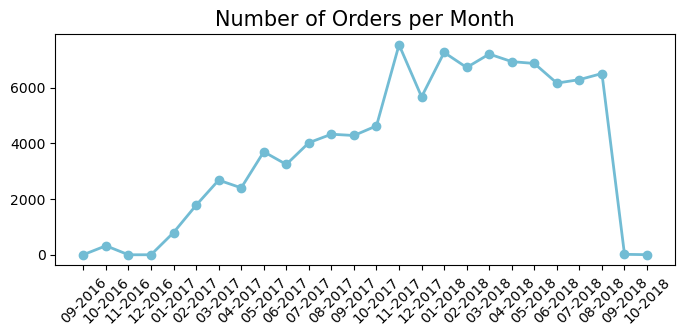

In [93]:
plt.figure(figsize=(8, 3))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["order_count"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Orders per Month", loc="center", fontsize=15)
plt.xticks(fontsize=10, rotation = 45)
plt.yticks(fontsize=10)
plt.show()

Total jumlah order mengalami kenaikan tiap bulannya. Yang tertinggi terjadi di bulan November 2017, setelah itu terjadi fluktuasi dan cenderung stabil sampai di bulan September 2018.

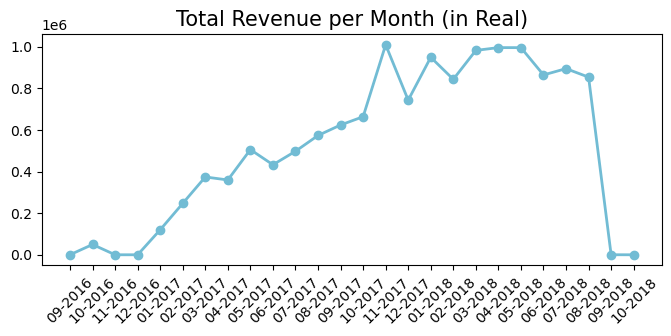

In [94]:
plt.figure(figsize=(8, 3))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["revenue"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month (in Real)", loc="center", fontsize=15)
plt.xticks(fontsize=10, rotation = 45)
plt.yticks(fontsize=10)
plt.show()

Hampir sama dengan jumlah order, revenue juga mengalami kenaikan tiap bulannya. Yang tertinggi terjadi di bulan November 2017, setelah itu terjadi fluktuasi dan cenderung stabil sampai di bulan September 2018.

### Pertanyaan 4 (RFM Analysis)

#### Bagaimana analisis RFM (Recency-Frequency-Monetary) terhadap customer? insight apa yang didapatkan?

In [95]:
#Membuat dataset baru bernama rfm_df untuk selanjutnya dilakukan analisis RFM
rfm_df = all_data.groupby(by="customer_unique_id", as_index=False).agg(
    max_order_date = ("order_purchase_timestamp", "max"), # mengambil tanggal order terakhir
    frequency = ("order_id", "nunique"), # menghitung jumlah order
    monetary = ("price", "sum") # menghitung total jumlah uang untuk pemesanan
    )

rfm_df

rfm_df['max_order_date'] = rfm_df['max_order_date'].dt.date #mengubah menjadi format tanggal
recent_order_date = all_data['order_purchase_timestamp'].dt.date.max() #memilih hari terakhir dalam kolom order_date
rfm_df.insert(1,'recency', rfm_df['max_order_date'].apply(lambda x: (recent_order_date - x).days)) #mencari selisih kapan terakhir pelanggan bertransaksi
rfm_df.drop('max_order_date', axis=1, inplace=True) #menghapus kolom yang tidak dibutuhkan
rfm_df.head(10)


,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,18.90
2,0000f46a3911fa3c0805444483337064,586,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.00
5,0004bd2a26a76fe21f786e4fbd80607f,195,1,154.00
6,00050ab1314c0e55a6ca13cf7181fecf,180,1,27.99
7,00053a61a98854899e70ed204dd4bafe,231,1,382.00
8,0005e1862207bf6ccc02e4228effd9a0,592,1,135.00
9,0005ef4cd20d2893f0d9fbd94d3c0d97,219,1,104.90


In [96]:
rfm_df.describe()

,recency,frequency,monetary
count,96096.000000,96096.000000,96096.000000
mean,288.108797,1.034809,141.438184
std,153.417869,0.214384,217.215904
min,0.000000,1.000000,0.000000
25%,164.000000,1.000000,45.990000
50%,269.000000,1.000000,89.000000
75%,397.000000,1.000000,154.000000
max,773.000000,17.000000,13440.000000


Terdapat sebanyak 96.096 pelanggan unik. Di antara semua pelanggan, ada yang bertransaksi terakhir paling lama 773 hari, dengan frekuensi berbelanja paling banyak 17 kali. Nilai maksimum order sebesar 13.440,00 Real.

#### Customer yang paling sering berbelanja

In [97]:
rfm_df.sort_values(by='frequency', ascending=False)

,customer_unique_id,recency,frequency,monetary
52973,8d50f5eadf50201ccdcedfb9e2ac8455,58,17,729.62
23472,3e43e6105506432c953e165fb2acf44c,232,9,1000.85
37797,6469f99c1f9dfae7733b25662e7f1782,111,7,664.20
76082,ca77025e7201e3b30c44b472ff346268,138,7,806.61
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,245,7,809.21
...,...,...,...,...
32508,5657dfebff5868c4dc7e8355fea865c4,340,1,89.99
32507,5657596addb4d7b07b32cd330614bdf8,348,1,159.99
32506,5656eb169546146caeab56c3ffc3d268,83,1,110.00
32505,5656a8fabc8629ff96b2bc14f8c09a27,321,1,14.03


customer '8d50f5eadf50201ccdcedfb9e2ac8455' berbelanja sebanyak 17 kali

#### Customer yang berbelanja paling banyak secara jumlah uang

In [98]:
rfm_df.sort_values(by='monetary', ascending=False)

,customer_unique_id,recency,frequency,monetary
3826,0a0a92112bd4c708ca5fde585afaa872,383,1,13440.0
81962,da122df9eeddfedc1dc1f5349a1a690c,564,2,7388.0
44447,763c8b1c9c68a0229c42c9fc6f662b93,94,1,7160.0
82808,dc4802a71eae9be1dd28f5d788ceb526,612,1,6735.0
26205,459bef486812aa25204be022145caa62,84,1,6729.0
...,...,...,...,...
27364,48aa83248476ac4d2b058596436b7680,76,1,0.0
82714,dc0eb6b79e438bca1400a408ff88fd15,266,1,0.0
19551,33e79e15e9937ba1bc8f61eedae9e7f0,79,1,0.0
77327,cdc8a55939d542adcdcf766ce064a40a,275,1,0.0


Customer '0a0a92112bd4c708ca5fde585afaa872' berbelanja sebesar 13.440 Real

In [99]:
# Memberikan ranking pada pelanggan berdasarkan skor recency, frequency, dan monetary
rfm_df['R_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['monetary'].rank(ascending=True)

# Normalisasi ranking pelanggan
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
rfm_df.head()

,customer_unique_id,recency,frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,129.90,76.264361,48.441142,48.441142
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,18.90,75.239864,48.441142,48.441142
2,0000f46a3911fa3c0805444483337064,586,1,69.00,3.661963,48.441142,48.441142
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,25.99,28.923160,48.441142,48.441142
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.00,33.970196,48.441142,48.441142


In [100]:
# Membuat RFM Score dengan weighted value
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm'] + 0.28 *rfm_df['F_rank_norm'] + 0.57*rfm_df['M_rank_norm'] #Weighting pada masing-masing parameter
rfm_df['RFM_Score'] = (0.05*rfm_df['RFM_Score']).round(2) #Mengubah nilai RFM Score menjadi nilai dengan maksimal 5 dan membulatkannya hingga 2 desimal

rfm_df = rfm_df[['customer_unique_id', 'recency','frequency','monetary','RFM_Score']]
rfm_df.head()

,customer_unique_id,recency,frequency,monetary,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,129.90,2.63
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,18.90,2.62
2,0000f46a3911fa3c0805444483337064,586,1,69.00,2.09
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,25.99,2.28
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.00,2.31


In [101]:
# Memberikan rating pada pelanggan berdasarkan RFM Score
'''
RFM Score > 4.5 : Top Customer
4.5 > RFM Score > 4 : High Value Customer
4> RFM Score > 3 : Medium Value Customer
3> RFM Score > 1.6 : Low Value Customer
RFM Score <1.6 : Lost Customer
'''
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_Score'] > 4.5, "Top Customer", (np.where(
        rfm_df['RFM_Score'] > 4, "High Value Customer",(np.where(
            rfm_df['RFM_Score'] > 3, "Medium Value Customer", np.where(
                rfm_df['RFM_Score'] > 1.6, 'Low Value Customer', 'Lost Customer')))))
)

rfm_df.head(10)

,customer_unique_id,recency,frequency,monetary,RFM_Score,customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,129.90,2.63,Low Value Customer
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,18.90,2.62,Low Value Customer
2,0000f46a3911fa3c0805444483337064,586,1,69.00,2.09,Low Value Customer
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,25.99,2.28,Low Value Customer
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.00,2.31,Low Value Customer
5,0004bd2a26a76fe21f786e4fbd80607f,195,1,154.00,2.57,Low Value Customer
6,00050ab1314c0e55a6ca13cf7181fecf,180,1,27.99,2.59,Low Value Customer
7,00053a61a98854899e70ed204dd4bafe,231,1,382.00,2.50,Low Value Customer
8,0005e1862207bf6ccc02e4228effd9a0,592,1,135.00,2.08,Low Value Customer
9,0005ef4cd20d2893f0d9fbd94d3c0d97,219,1,104.90,2.52,Low Value Customer


In [102]:
# Melihat Pembagian Segmen Pelanggan Berdasarkan RFM Score
rfm_df.customer_segment.value_counts()

customer_segment
Low Value Customer     93099
Top Customer            1841
High Value Customer     1156
Name: count, dtype: int64

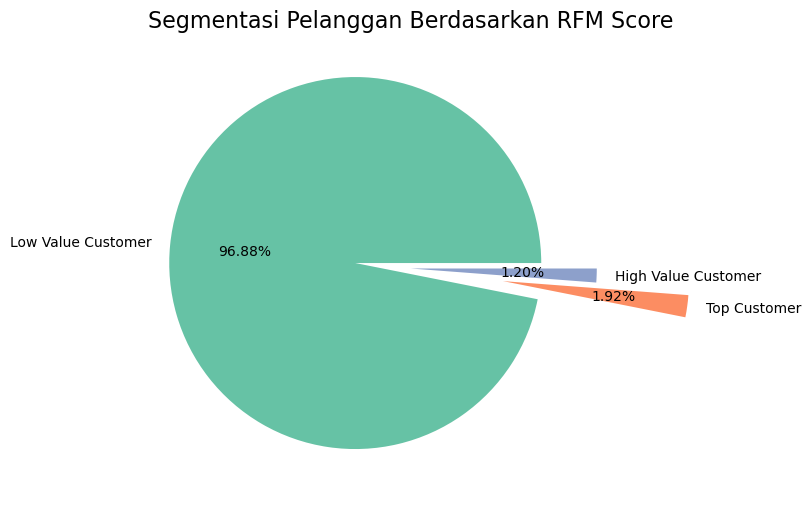

In [103]:
plt.figure(figsize=(6,8))
plt.pie(
    rfm_df.customer_segment.value_counts(),
    labels= rfm_df.customer_segment.value_counts().index,
    autopct= '%1.2f%%',
    explode = [0.3, 0.5, 0],
    colors= sns.color_palette('Set2')
)
plt.title("Segmentasi Pelanggan Berdasarkan RFM Score", loc='center', fontsize=16)
plt.show()

Berdasarkan hasil analisis RFM, sebagian besar pelanggan berada pada segmen Low Value Customer dengan persentase sebanyak 96,88%, yang sisanya diikuti oleh pelanggan Top Customer sebanyak 1,92% dan High Value Customer sebanyak 1,20%.

In [104]:
# Melihat pelanggan yang memiliki RFM Score dan Monetary Score tertinggi
rfm_df.sort_values(by=['RFM_Score', 'monetary'],ascending=False).head(10)

,customer_unique_id,recency,frequency,monetary,RFM_Score,customer_segment
82883,dc813062e0fc23409cd255f7f53c7074,55,6,687.76,5.00,Top Customer
52973,8d50f5eadf50201ccdcedfb9e2ac8455,58,17,729.62,4.99,Top Customer
58920,9cc5a07f169a1606fd347a56683e6ea6,56,4,365.70,4.99,Top Customer
19858,34b0cd95480e55c2a701293a2b9671b3,50,3,263.63,4.99,Top Customer
65954,af5454198a97379394cacf676e1e96cb,14,3,178.00,4.99,Top Customer
95784,ff36be26206fffe1eb37afd54c70e18b,55,3,77.90,4.99,Top Customer
70105,ba84da8c159659f116329563a0a981dd,21,3,76.00,4.99,Top Customer
84370,e0836a97eaae86ac4adc26fbb334a527,51,3,62.98,4.99,Top Customer
13210,230a1e9f42924d41f37fd22a1d4a9707,41,3,52.90,4.99,Top Customer
89783,ef0103e9602d12594d19c2b666219bc1,30,3,0.00,4.99,Top Customer


Pelanggan dengan ID dc813062e0fc23409cd255f7f53c7074 merupakan pelanggan terbaik yang memiliki RFM Score yang tertinggi.

### Conclusion

1. Produk dalam kategori apa yang memiliki jumlah pesanan paling banyak dan paling sedikit?

   Produk heatlh and beauty memiliki jumlah total order tertinggi sementera produk security and services memiliki jumlah total order paling sedikit.

2. Tunjukkan 10 kota dengan pembeli terbanyak!

    Kota dengan jumlah pembeli terbanyak adalah :
    1. Sao Paulo
    2. Rio de Janeiro
    3. Belo Horizonte
    4. Brasilia
    5. Curitiba
    6. Campinas
    7. Porto Alegre
    8. Salvador
    9. Guarulhos
    10. Sao Bernardo do Campo   

3. Bagaimana tren penjualan dalam kurun waktu data didapatkan?

   Total jumlah order mengalami kenaikan tiap bulannya. Yang tertinggi terjadi
   di bulan November 2017, setelah itu terjadi fluktuasi dan cenderung stabil sampai di bulan September 2018.

   Hampir sama dengan jumlah order, revenue juga mengalami kenaikan tiap bulannya. Yang tertinggi terjadi di bulan November 2017, setelah itu terjadi fluktuasi dan cenderung stabil sampai di bulan September 2018.

4. Bagaimana analisis RFM (Recency-Frequency-Monetary) terhadap customer? insight apa yang didapatkan?

   - Terdapat sebanyak 96.096 pelanggan unik. Di antara semua pelanggan, ada yang bertransaksi terakhir paling lama 773 hari, dengan frekuensi berbelanja paling banyak 17 kali. Nilai maksimum order sebesar 13.440,00 Real.
   - Pelanggan dengan jumlah pembelian terbanyak adalah customer '8d50f5eadf50201ccdcedfb9e2ac8455' yang berbelanja sebanyak 17 kali.
   - Pelanggan dengan yang berbelanja paling banyak secara jumlah uang adalah customer '0a0a92112bd4c708ca5fde585afaa872' yang telah berbelanja sebesar 13.440 Real.
   - Berdasarkan hasil analisis RFM, sebagian besar pelanggan berada pada segmen Low Value Customer dengan persentase sebanyak 96,88% (93.099 customer), yang sisanya diikuti oleh pelanggan Top Customer sebanyak 1,92% (1.841 customer) dan High Value Customer sebanyak 1,20% (1.156 customer).
   - Pelanggan dengan ID 'dc813062e0fc23409cd255f7f53c7074' merupakan pelanggan terbaik yang memiliki RFM Score yang tertinggi.

In [105]:
all_data.to_csv("all_data.csv", index=False)

### Selesai